## Loan Status Prediction

- Main aim of this dataset to predict which of the customers will have their loan dataset
- Using machine learning model to predict it
- Dataset is Load prediction

In [76]:
##Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.feature_selection import RFE


In [2]:

train_data = pd.read_csv('train.csv', index_col=None)
test_data = pd.read_csv('test.csv', index_col=None)

LoanData = pd.concat([train_data, test_data], axis=0, sort=False)

# Reset index
LoanData.reset_index(drop=True, inplace=True)

LoanData.to_csv('LoanData.csv', index=False)

In [27]:
data=pd.read_csv('LoanData.csv',index_col=None)
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
Loan_ID              981 non-null object
Gender               957 non-null object
Married              978 non-null object
Dependents           956 non-null object
Education            981 non-null object
Self_Employed        926 non-null object
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
LoanAmount           954 non-null float64
Loan_Amount_Term     961 non-null float64
Credit_History       902 non-null float64
Property_Area        981 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 99.8+ KB


In [6]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


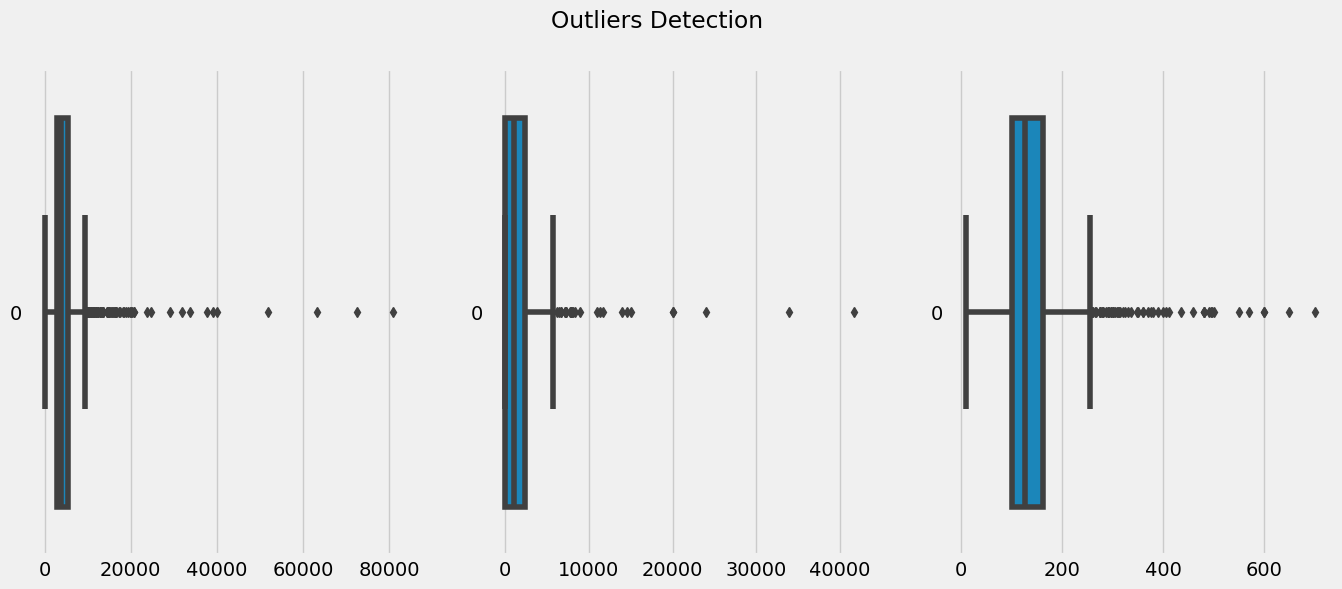

In [5]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 6)

plt.subplot(1, 3, 1)
sns.boxplot(data['ApplicantIncome'],orient='h')

plt.subplot(1, 3, 2)
sns.boxplot(data['CoapplicantIncome'],orient='h')

plt.subplot(1, 3, 3)
sns.boxplot(data['LoanAmount'],orient='h')

plt.suptitle("Outliers Detection")
plt.show()

In [6]:
data.describe(include = 'object')


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,981,957,978,956,981,926,981,614
unique,981,2,2,4,2,2,3,2
top,LP001205,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,775,631,545,763,807,349,422


In [7]:
#Split into Quantitaive and Qualitive
def Quan_Qual_data(data):
    Quan=[]
    Qual=[]
    for columns in data.columns:
        if data[columns].dtypes=='O':
            Qual.append(columns)
        else:
            Quan.append(columns)
    return Quan,Qual

In [8]:
Quan,Qual=Quan_Qual_data(data)

In [9]:
#To check the null values
data.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [10]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [11]:
data['Loan_Status']

0        Y
1        N
2        Y
3        Y
4        Y
      ... 
976    NaN
977    NaN
978    NaN
979    NaN
980    NaN
Name: Loan_Status, Length: 981, dtype: object

In [15]:
#Few records Loan_Status has null value move it to another dataframe use it as a model prediction
new_data=data[data['Loan_Status'].isnull()]


In [28]:
#Removing records when loan_status is null in main dataframe
data=data.dropna(subset=['Loan_Status'])
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [29]:
data['Loan_Status']

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [18]:
data

In [31]:
#Null values present in both categorical and numerical value
def replace_null(data):
    for column in data.columns:
        if column != 'Loan_Status':
            if data[column].dtypes == 'O':
                data[column].fillna(data[column].mode()[0], inplace=True)
            else:
                data[column].fillna(data[column].median(), inplace=True)

                        

In [32]:
replace_null(data)

In [33]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

- Target variable (Loan_Status) is an important step in the data preprocessing phase. Since your target variable is categorical, and it seems to be imbalanced with more 'Y' (422 instances) than 'N' (192 instances),
- After Univariate/Bivariate/Distribution/Visualization we can predict the target variable Loan_Status using model

In [34]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## Univariate

In [35]:
def Univariate(dataset,quan):
        descriptive=pd.DataFrame(index=["Mean","Median","Mode","Q1:25%","Q2:50%",
                                   "Q3:75%","99%","Q4:100%","IQR","1.5rule","Lesser","Greater","Min","Max"],columns=quan)
        for columnName in quan:
            descriptive[columnName]["Mean"]=dataset[columnName].mean()
            descriptive[columnName]["Median"]=dataset[columnName].median()
            descriptive[columnName]["Mode"]=dataset[columnName].mode()[0]
            descriptive[columnName]["Q1:25%"]=dataset.describe()[columnName]["25%"]
            descriptive[columnName]["Q2:50%"]=dataset.describe()[columnName]["50%"]
            descriptive[columnName]["Q3:75%"]=dataset.describe()[columnName]["75%"]
            descriptive[columnName]["99%"]=np.percentile(dataset[columnName],99)
            descriptive[columnName]["Q4:100%"]=dataset.describe()[columnName]["max"]
            descriptive[columnName]["IQR"]=descriptive[columnName]["Q3:75%"]-descriptive[columnName]["Q1:25%"]
            descriptive[columnName]["1.5rule"]=1.5*descriptive[columnName]["IQR"]
            descriptive[columnName]["Lesser"]=descriptive[columnName]["Q1:25%"]-descriptive[columnName]["1.5rule"]
            descriptive[columnName]["Greater"]=descriptive[columnName]["Q3:75%"]+descriptive[columnName]["1.5rule"]
            descriptive[columnName]["Min"]=dataset[columnName].min()
            descriptive[columnName]["Max"]=dataset[columnName].max()
            descriptive[columnName]["kurtosis"]=dataset[columnName].kurtosis()
            descriptive[columnName]["skew"]=dataset[columnName].skew()
            descriptive[columnName]["Var"]=dataset[columnName].var()
            descriptive[columnName]["Std"]=dataset[columnName].std()
        return descriptive

In [36]:
descriptive=Univariate(data,Quan)

In [37]:
descriptive

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Mean,5403.46,1621.25,145.752,342.41,0.855049
Median,3812.5,1188.5,128,360,1
Mode,2500,0,128,360,1
Q1:25%,2877.5,0,100.25,360,1
Q2:50%,3812.5,1188.5,128,360,1
Q3:75%,5795,2297.25,164.75,360,1
99%,32540.4,8895.89,495.87,480,1
Q4:100%,81000,41667,700,480,1
IQR,2917.5,2297.25,64.5,0,0
1.5rule,4376.25,3445.88,96.75,0,0


In [38]:
#Check the outliers
def check_outliers(Quan):
        Lesser = []
        Greater = []

        for column_name in Quan:
            if descriptive[column_name]['Min'] < descriptive[column_name]['Lesser']:
                Lesser.append(column_name)
            if descriptive[column_name]['Max'] > descriptive[column_name]['Greater']:
                Greater.append(column_name)
        return Lesser, Greater

In [39]:
Lesser,Greater=check_outliers(Quan)

In [40]:
Lesser

['Loan_Amount_Term', 'Credit_History']

In [41]:
Greater

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [42]:
# Replace the Outliers
def replace_outliers(Lesser, Greater):
    for column_name in Lesser:
        data[column_name][data[column_name] < descriptive[column_name]['Lesser']] = descriptive[column_name]['Lesser']

    for column_name in Greater:
        data[column_name][data[column_name] > descriptive[column_name]['Greater']] = descriptive[column_name]['Greater']

    return descriptive

In [43]:
descriptive=replace_outliers(Lesser,Greater)

C:\Users\Arun\anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Arun\anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Arun\anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [44]:
def Univariate(dataset,quan):
        descriptive=pd.DataFrame(index=["Mean","Median","Mode","Q1:25%","Q2:50%",
                                   "Q3:75%","99%","Q4:100%","IQR","1.5rule","Lesser","Greater","Min","Max"],columns=quan)
        for columnName in quan:
            descriptive[columnName]["Mean"]=dataset[columnName].mean()
            descriptive[columnName]["Median"]=dataset[columnName].median()
            descriptive[columnName]["Mode"]=dataset[columnName].mode()[0]
            descriptive[columnName]["Q1:25%"]=dataset.describe()[columnName]["25%"]
            descriptive[columnName]["Q2:50%"]=dataset.describe()[columnName]["50%"]
            descriptive[columnName]["Q3:75%"]=dataset.describe()[columnName]["75%"]
            descriptive[columnName]["99%"]=np.percentile(dataset[columnName],99)
            descriptive[columnName]["Q4:100%"]=dataset.describe()[columnName]["max"]
            descriptive[columnName]["IQR"]=descriptive[columnName]["Q3:75%"]-descriptive[columnName]["Q1:25%"]
            descriptive[columnName]["1.5rule"]=1.5*descriptive[columnName]["IQR"]
            descriptive[columnName]["Lesser"]=descriptive[columnName]["Q1:25%"]-descriptive[columnName]["1.5rule"]
            descriptive[columnName]["Greater"]=descriptive[columnName]["Q3:75%"]+descriptive[columnName]["1.5rule"]
            descriptive[columnName]["Min"]=dataset[columnName].min()
            descriptive[columnName]["Max"]=dataset[columnName].max()
            descriptive[columnName]["kurtosis"]=dataset[columnName].kurtosis()
            descriptive[columnName]["skew"]=dataset[columnName].skew()
            descriptive[columnName]["Var"]=dataset[columnName].var()
            descriptive[columnName]["Std"]=dataset[columnName].std()
        return descriptive

In [45]:
descriptive=Univariate(data,Quan)

In [46]:
descriptive

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Mean,4617.11,1419.7,137.366,360,1
Median,3812.5,1188.5,128,360,1
Mode,10171.2,0,261.5,360,1
Q1:25%,2877.5,0,100.25,360,1
Q2:50%,3812.5,1188.5,128,360,1
Q3:75%,5795,2297.25,164.75,360,1
99%,10171.2,5743.12,261.5,360,1
Q4:100%,10171.2,5743.12,261.5,360,1
IQR,2917.5,2297.25,64.5,0,0
1.5rule,4376.25,3445.88,96.75,0,0


In [50]:
data = data.drop('Loan_ID', axis=1)
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106.0,0.0,40.0,360.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072.0,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583.0,0.0,187.0,360.0,1.0,Urban,Y


In [51]:
#Frequency Dataframe
def freq_tables(data):
    categorical_columns = data.select_dtypes(include=['object']).columns

    all_freq_tables = {}
    for column in categorical_columns:
        freq_table = pd.DataFrame(columns=['Unique_value', 'Frequency', 'Relative_Freq', 'Cumulative_Frequency'])
        freq_table['Unique_value'] = data[column].value_counts().sort_index(ascending=False)
        freq_table['Frequency'] = data[column].value_counts().sort_values(ascending=False)
        freq_table['Relative_Freq'] = freq_table['Frequency'] / len(data)
        freq_table['Cumulative_Frequency'] = freq_table['Relative_Freq'].cumsum()

        all_freq_tables[column] = freq_table

    return all_freq_tables

In [52]:
result_df = freq_tables(data)
result_df

{'Gender':         Unique_value  Frequency  Relative_Freq  Cumulative_Frequency
 Male             502        502        0.81759               0.81759
 Female           112        112        0.18241               1.00000,
 'Married':      Unique_value  Frequency  Relative_Freq  Cumulative_Frequency
 Yes           401        401       0.653094              0.653094
 No            213        213       0.346906              1.000000,
 'Dependents':     Unique_value  Frequency  Relative_Freq  Cumulative_Frequency
 3+            51         51       0.083062              0.083062
 2            101        101       0.164495              0.247557
 1            102        102       0.166124              0.413681
 0            360        360       0.586319              1.000000,
 'Education':               Unique_value  Frequency  Relative_Freq  Cumulative_Frequency
 Not Graduate           134        134       0.218241              0.218241
 Graduate               480        480       0.781759   

## Distribution and Standard Normal Distribution

C:\Users\Arun\anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  
C:\Users\Arun\anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """
C:\Users\Arun\anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.

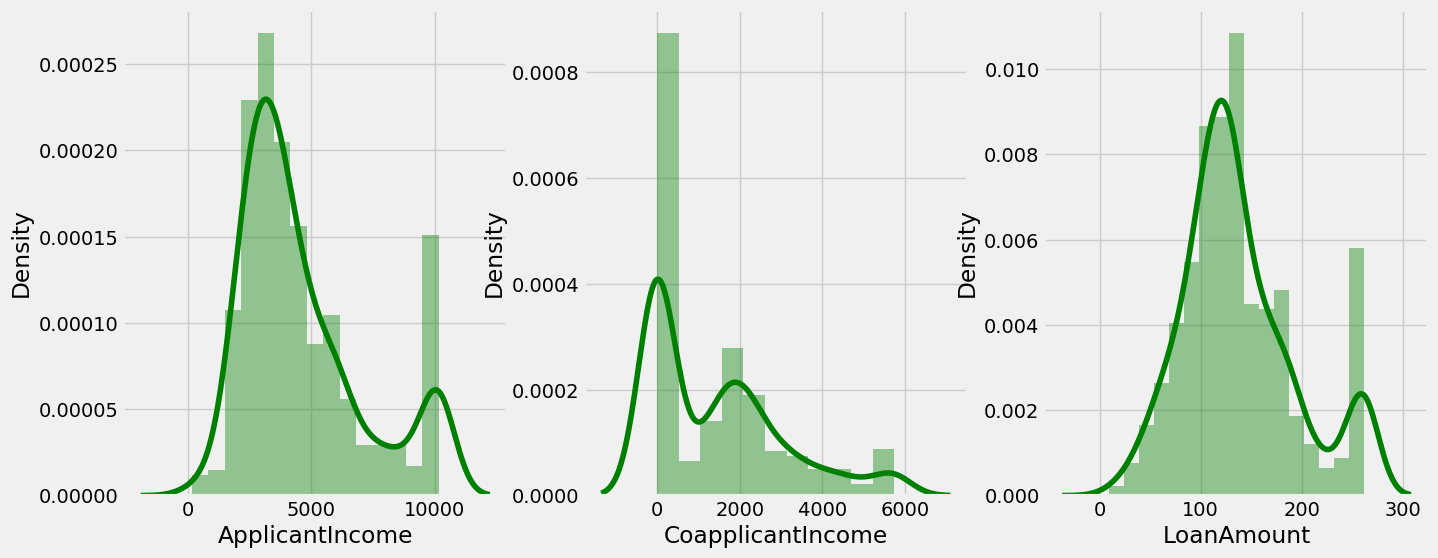

In [54]:
plt.subplot(1, 3, 1)
sns.distplot(data['ApplicantIncome'], color = 'green')

plt.subplot(1, 3, 2)
sns.distplot(data['CoapplicantIncome'], color = 'green')

plt.subplot(1, 3, 3)
sns.distplot(data['LoanAmount'], color = 'green')

In [55]:
## Standard Normal Distribution

def std_graph(data):
    # Calculate mean and standard deviation for each feature
    mean_values = data.mean()
    std_values = data.std()

    # Create subplots for each feature
    num_features = len(data.columns)
    fig, axes = plt.subplots(nrows=num_features, figsize=(8, 4 * num_features))

    # Iterate through each feature and plot its z-scores
    for i, feature in enumerate(data.columns):
        values = list(data[feature])
        z_scores = [(X - mean_values[feature]) / std_values[feature] for X in values]

        sns.distplot(z_scores, kde=True, ax=axes[i])
        axes[i].set_title(f'{feature} Z-Score Distribution')

    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()


C:\Users\Arun\anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  app.launch_new_instance()
C:\Users\Arun\anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  app.launch_new_instance()
C:\Users\Arun\anaconda

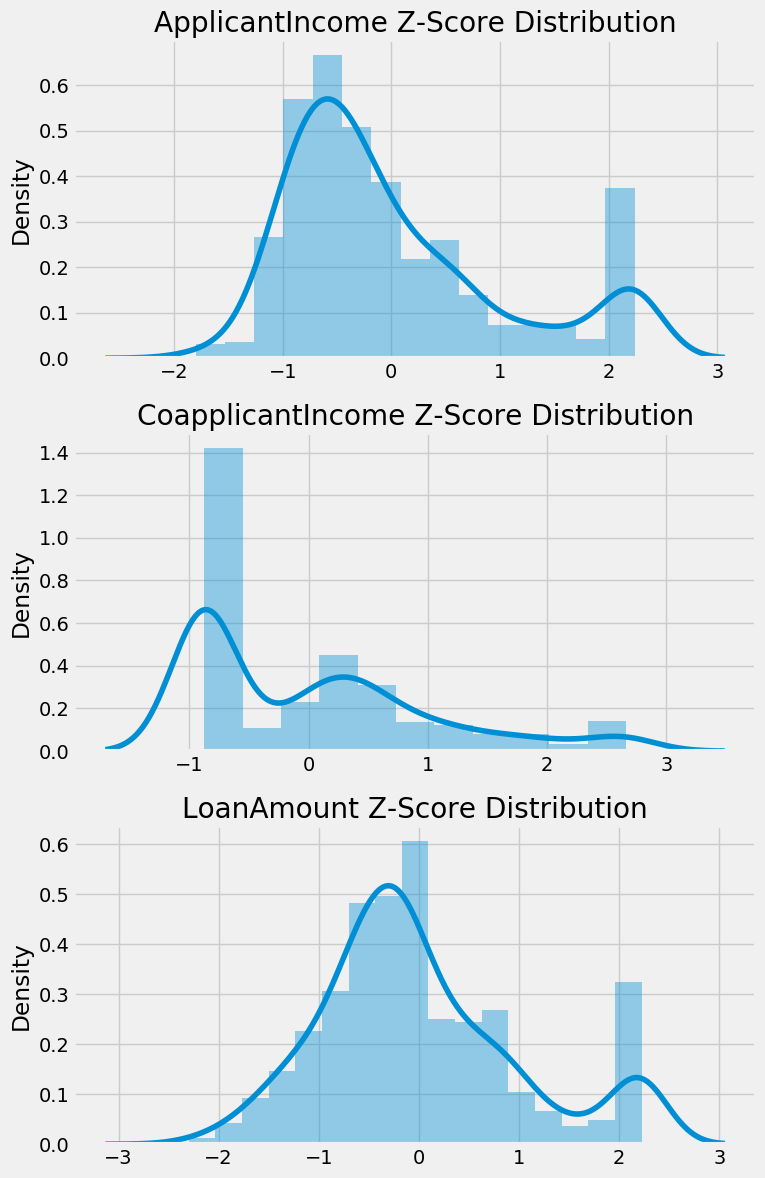

In [56]:
std_graph(data[['ApplicantIncome','CoapplicantIncome','LoanAmount']])

## Bivariate

In [57]:
data[['ApplicantIncome','CoapplicantIncome','LoanAmount']].cov()

,ApplicantIncome,CoapplicantIncome,LoanAmount
ApplicantIncome,6.149665e+06,-9.224141e+05,77179.062731
CoapplicantIncome,-9.224141e+05,2.639344e+06,24016.264314
LoanAmount,7.717906e+04,2.401626e+04,3111.380367


- covariance values are influenced by the scale of the variables, and it can be challenging to compare covariances directly. If you want a standardized measure that is easier to compare, you may consider the correlation coefficient, which normalizes the covariance by the standard deviations of the variables.

In [58]:
data[['ApplicantIncome','CoapplicantIncome','LoanAmount']].corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount
ApplicantIncome,1.000000,-0.228956,0.557953
CoapplicantIncome,-0.228956,1.000000,0.265021
LoanAmount,0.557953,0.265021,1.000000


- There is a weak negative correlation between ApplicantIncome and CoapplicantIncome.
- There is a moderate positive correlation between ApplicantIncome and LoanAmount.
- There is a weak positive correlation between CoapplicantIncome and LoanAmount.

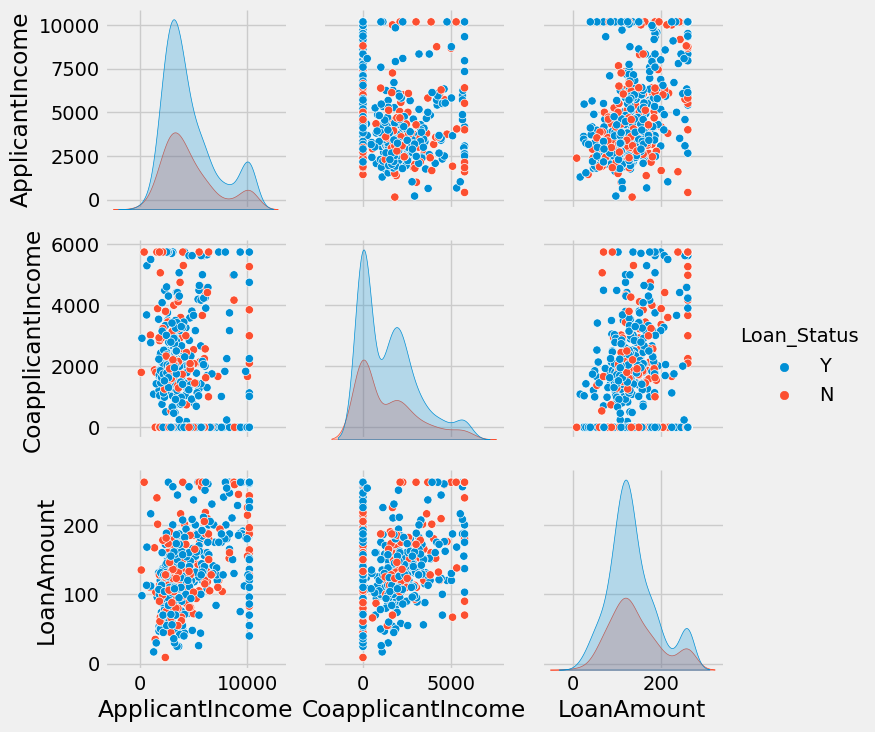

In [59]:
# visualize the pair to check multicollinearity

sns.pairplot(data[['ApplicantIncome','CoapplicantIncome','LoanAmount'] + ['Loan_Status']], hue='Loan_Status')
plt.show()


In [62]:
# Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor


def calc_vif(data_frame):
    variables = data_frame.columns
    vif_data = pd.DataFrame()
    vif_data["Variable"] = variables
    vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
    return vif_data


In [63]:
calc_vif(data[Quan])

C:\Users\Arun\anaconda3\envs\aiml\lib\site-packages\statsmodels\regression\linear_model.py:1752: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,Variable,VIF
0,ApplicantIncome,1.865794
1,CoapplicantIncome,1.382020
2,LoanAmount,1.901545
3,Loan_Amount_Term,0.000000
4,Credit_History,0.000000


## Chi Square Test when Input and target is categorical

In [64]:
from scipy.stats import chi2_contingency

categorical_features = ['Dependents', 'Education', 'Gender', 'Married', 'Property_Area', 'Self_Employed']

for feature in categorical_features:
    contingency_table = pd.crosstab(data[feature], data['Loan_Status'])
    
    # Perform chi-square test
    chi2, p, _, _ = chi2_contingency(contingency_table)

    # Check p-value
    print(f"\nChi-square test for {feature}:")
    print(f"Chi2 value: {chi2}")
    print(f"P-value: {p}")
    
    if p < 0.05:
        print("Reject the null hypothesis. There is a significant association.")
    else:
        print("Fail to reject the null hypothesis. No significant association.")



Chi-square test for Dependents:
Chi2 value: 3.1513990012324227
P-value: 0.3688663081366005
Fail to reject the null hypothesis. No significant association.

Chi-square test for Education:
Chi2 value: 4.091490413303621
P-value: 0.04309962129357355
Reject the null hypothesis. There is a significant association.

Chi-square test for Gender:
Chi2 value: 0.11087854691241235
P-value: 0.7391461310869638
Fail to reject the null hypothesis. No significant association.

Chi-square test for Married:
Chi2 value: 4.73187557933362
P-value: 0.029608580862582116
Reject the null hypothesis. There is a significant association.

Chi-square test for Property_Area:
Chi2 value: 12.297623130485675
P-value: 0.0021360187811644937
Reject the null hypothesis. There is a significant association.

Chi-square test for Self_Employed:
Chi2 value: 0.0
P-value: 1.0
Fail to reject the null hypothesis. No significant association.


significant difference between Education, Married, and Property_Area variables, while no significant associations were found for Dependents, Gender, and Self_Employed variables.

## Ttest or Anova test when input has numerical and Target has Categorical or Input has categoricl and Target has numerical

In [76]:
## Input has numerical and Target has Categorical

from scipy.stats import ttest_ind

# Split the data into two groups based on Loan_Status
loan_status_yes = data[data['Loan_Status'] == 'Y']
loan_status_no = data[data['Loan_Status'] == 'N']

# Perform t-test for each numerical feature
for feature in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']:
    t_stat, p_value = ttest_ind(loan_status_yes[feature], loan_status_no[feature])
    
    print(f"\nT-test for {feature}:")
    print(f"T-statistic: {t_stat}")
    print(f"P-value: {p_value}")
    
    if p_value < 0.05:
        print("Reject the null hypothesis. There is a significant difference.")
    else:
        print("Fail to reject the null hypothesis. No significant difference.")



T-test for ApplicantIncome:
T-statistic: -0.11650844828724542
P-value: 0.907287812130518
Fail to reject the null hypothesis. No significant difference.

T-test for CoapplicantIncome:
T-statistic: -1.4667846999020244
P-value: 0.14294828684286368
Fail to reject the null hypothesis. No significant difference.

T-test for LoanAmount:
T-statistic: -0.8134378118723684
P-value: 0.4162834370578369
Fail to reject the null hypothesis. No significant difference.


In [65]:
from scipy.stats import f_oneway

# Perform ANOVA for each numerical feature
for feature in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']:
    groups = [data[data['Loan_Status'] == status][feature] for status in data['Loan_Status'].unique()]
    
    f_stat, p_value = f_oneway(*groups)
    
    print(f"\nANOVA for {feature}:")
    print(f"F-statistic: {f_stat}")
    print(f"P-value: {p_value}")
    
    if p_value < 0.05:
        print("Reject the null hypothesis. There is a significant difference.")
    else:
        print("Fail to reject the null hypothesis. No significant difference.")



ANOVA for ApplicantIncome:
F-statistic: 0.00011962709019694214
P-value: 0.9912769421990383
Fail to reject the null hypothesis. No significant difference.

ANOVA for CoapplicantIncome:
F-statistic: 0.08788891095060343
P-value: 0.7669788988824301
Fail to reject the null hypothesis. No significant difference.

ANOVA for LoanAmount:
F-statistic: 1.3701001688515915
P-value: 0.24225025694784605
Fail to reject the null hypothesis. No significant difference.


- no significant difference in the means between the groups with different Loan_Status values ('Y' and 'N' and 'N/A)

- there is no strong evidence of a significant difference between the groups with different Loan_Status values for these numerical features.

- no significant difference in the means between the groups with different Loan_Status values ('Y' and 'N' and 'N/A)

## Define the function for feature selection,standardisation,splitting and model

In [122]:
def selectkbest(indep_X, dep_Y, n, feature_names):
    test = SelectKBest(score_func=chi2, k=n)
    fit1 = test.fit(indep_X, dep_Y)
    selectk_features = fit1.transform(indep_X)
    selected_features = fit1.get_support()
    selected_feature_names = [feature_names[i] for i, selected in enumerate(selected_features) if selected]
    return selectk_features, selected_features, selected_feature_names

def print_metrics(classifier_name, accuracy, cm, classification_report):
    print("=" * 40)
    print(f"{classifier_name}\nAccuracy: {accuracy}\nConfusion Matrix:\n{cm}\nClassification Report:\n{classification_report}\n")

def split_scalar(indep_X, dep_Y):
    X_train, X_test, y_train, y_test = train_test_split(indep_X, dep_Y, test_size=0.25, random_state=0)
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    return X_train, X_test, y_train, y_test

def cm_prediction(classifier, X_test, y_test):
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    Accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return classifier, Accuracy, report, X_test, y_test, cm

def logistic(X_train, y_train, X_test, y_test):
    classifier = LogisticRegression(random_state=0)
    classifier.fit(X_train, y_train)
    classifier, Accuracy, report, X_test, y_test, cm = cm_prediction(classifier, X_test, y_test)
    return classifier, Accuracy, report, X_test, y_test, cm

def svm_linear(X_train, y_train, X_test, y_test):
    classifier = SVC(kernel='linear', random_state=0)
    classifier.fit(X_train, y_train)
    classifier, Accuracy, report, X_test, y_test, cm = cm_prediction(classifier, X_test, y_test)
    return classifier, Accuracy, report, X_test, y_test, cm

def svm_NL(X_train, y_train, X_test, y_test):
    classifier = SVC(kernel='rbf', random_state=0)
    classifier.fit(X_train, y_train)
    classifier, Accuracy, report, X_test, y_test, cm = cm_prediction(classifier, X_test, y_test)
    return classifier, Accuracy, report, X_test, y_test, cm

def Navie(X_train, y_train, X_test, y_test):
    classifier = GaussianNB()
    classifier.fit(X_train, y_train)
    classifier, Accuracy, report, X_test, y_test, cm = cm_prediction(classifier, X_test, y_test)
    return classifier, Accuracy, report, X_test, y_test, cm

def knn(X_train, y_train, X_test, y_test):
    classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
    classifier.fit(X_train, y_train)
    classifier, Accuracy, report, X_test, y_test, cm = cm_prediction(classifier, X_test, y_test)
    return classifier, Accuracy, report, X_test, y_test, cm

def Decision(X_train, y_train, X_test, y_test):
    classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
    classifier.fit(X_train, y_train)
    classifier, Accuracy, report, X_test, y_test, cm = cm_prediction(classifier, X_test, y_test)
    return classifier, Accuracy, report, X_test, y_test, cm

def random(X_train, y_train, X_test, y_test):
    classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
    classifier.fit(X_train, y_train)
    classifier, Accuracy, report, X_test, y_test, cm = cm_prediction(classifier, X_test, y_test)
    return classifier, Accuracy, report, X_test, y_test, cm

def selectk_Classification(acclog, accsvml, accsvmnl, accknn, accnav, accdes, accrf): 
    dataframe = pd.DataFrame(index=['ChiSquare'],
                             columns=['Logistic', 'SVMl', 'SVMnl', 'KNN', 'Navie', 'Decision', 'Random'])
    for number, idex in enumerate(dataframe.index):      
        dataframe['Logistic'][idex] = acclog[number]       
        dataframe['SVMl'][idex] = accsvml[number]
        dataframe['SVMnl'][idex] = accsvmnl[number]
        dataframe['KNN'][idex] = accknn[number]
        dataframe['Navie'][idex] = accnav[number]
        dataframe['Decision'][idex] = accdes[number]
        dataframe['Random'][idex] = accrf[number]
    return dataframe

In [68]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106.0,0.0,40.0,360.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072.0,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583.0,0.0,187.0,360.0,1.0,Urban,Y


In [69]:
# Convert categorical to numerical one
data=pd.get_dummies(data,drop_first=True)

In [71]:
data.head(3)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849.0,0.0,128.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583.0,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000.0,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1


In [72]:
indep_X=data.drop('Loan_Status_Y', 1)
dep_Y=data['Loan_Status_Y']

In [73]:
indep_X

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849.0,0.0,128.0,360.0,1.0,1,0,0,0,0,0,0,0,1
1,4583.0,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0
2,3000.0,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1
3,2583.0,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1
4,6000.0,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900.0,0.0,71.0,360.0,1.0,0,0,0,0,0,0,0,0,0
610,4106.0,0.0,40.0,360.0,1.0,1,1,0,0,1,0,0,0,0
611,8072.0,240.0,253.0,360.0,1.0,1,1,1,0,0,0,0,0,1
612,7583.0,0.0,187.0,360.0,1.0,1,1,0,1,0,0,0,0,1


In [74]:
dep_Y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status_Y, Length: 614, dtype: uint8

In [106]:
data.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Male', 'Married_Yes',
       'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Status_Y'],
      dtype='object')

In [123]:
feature_names = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Male', 'Married_Yes',
       'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Status_Y']
kbest, selected_features, selected_feature_names = selectkbest(indep_X, dep_Y, 10, feature_names)

acclog = []
accsvml = []
accsvmnl = []
accknn = []
accnav = []
accdes = []
accrf = []

print("Selected Features:", selected_feature_names)

X_train, X_test, y_train, y_test = split_scalar(kbest, dep_Y)

logistic_classifier, accuracy_log, report_log, X_test, y_test, cm_log = logistic(X_train, y_train, X_test, y_test)
acclog.append(accuracy_log)
print_metrics("Logistic Regression", accuracy_log, cm_log, report_log)


svm_linear_classifier, accuracy_svcl, report_svcl, X_test, y_test, cm_svcl = svm_linear(X_train, y_train, X_test, y_test)
accsvml.append(accuracy_svcl)
print_metrics("SVM Linear", accuracy_svcl, cm_svcl, report_svcl)


svm_NL_classifier, accuracy_svcnl, report_svcnl, X_test, y_test, cm_svcnl = svm_NL(X_train, y_train, X_test, y_test)
accsvmnl.append(accuracy_svcnl)
print_metrics("SVM Non-Linear", accuracy_svcnl, cm_svcnl, report_svcnl)


knn_classifier, accuracy_knn, report_knn, X_test, y_test, cm_knn = knn(X_train, y_train, X_test, y_test)
accknn.append(accuracy_knn)
print_metrics("KNN", accuracy_knn, cm_knn, report_knn)


navie_classifier, accuracy_nav, report_nav, X_test, y_test, cm_nav = Navie(X_train, y_train, X_test, y_test)
accnav.append(accuracy_nav)
print_metrics("Naive Bayes", accuracy_nav, cm_nav, report_nav)


decision_classifier, accuracy_dec, report_dec, X_test, y_test, cm_dec = Decision(X_train, y_train, X_test, y_test)
accdes.append(accuracy_dec)
print_metrics("Decision Tree", accuracy_dec, cm_dec, report_dec)


random_classifier, accuracy_random, report_random, X_test, y_test, cm_random = random(X_train, y_train, X_test, y_test)
accrf.append(accuracy_random)
print_metrics("Random Forest", accuracy_random, cm_random, report_random)



Selected Features: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Married_Yes', 'Dependents_1', 'Dependents_2', 'Dependents_3+', 'Education_Not Graduate', 'Property_Area_Semiurban', 'Property_Area_Urban']
Logistic Regression
Accuracy: 0.7207792207792207
Confusion Matrix:
[[  3  40]
 [  3 108]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.07      0.12        43
           1       0.73      0.97      0.83       111

    accuracy                           0.72       154
   macro avg       0.61      0.52      0.48       154
weighted avg       0.67      0.72      0.64       154


SVM Linear
Accuracy: 0.7207792207792207
Confusion Matrix:
[[  0  43]
 [  0 111]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.72      1.00      0.84       111

    accuracy                           0.72       154
   macro avg       0.36

C:\Users\Arun\anaconda3\envs\aiml\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Arun\anaconda3\envs\aiml\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Arun\anaconda3\envs\aiml\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [116]:
result=selectk_Classification(acclog,accsvml,accsvmnl,accknn,accnav,accdes,accrf)

result#10


,Logistic,SVMl,SVMnl,KNN,Navie,Decision,Random
ChiSquare,0.720779,0.720779,0.714286,0.636364,0.701299,0.584416,0.623377


- Based on the results, it depends on the importance of precision, recall, and accuracy in your specific case. If correctly identifying class 1 (approved loans) is crucial and you can tolerate some false positives, SVM Linear or Non-Linear might be suitable. If you need a balance between classes and are willing to sacrifice some accuracy, Logistic Regression or Naive Bayes could be considered.
- In this case I could tolerate false positive and choose SVM linear model

In [129]:
X_train.shape

(460, 10)

In [130]:
len(selected_features)

14

In [82]:
results = selectk_Classification(acclog, accsvml, accsvmnl, accknn, accnav, accdes, accrf)
results#10

,Logistic,SVMl,SVMnl,KNN,Navie,Decision,Random
ChiSquare,0.720779,0.720779,0.714286,0.636364,0.701299,0.584416,0.623377


In [88]:
import pickle
filename='finaized_model_svc.sav'

In [89]:
pickle.dump(svm_linear_classifier,open(filename,'wb'))

In [134]:
new_data=new_data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Married', 'Dependents', 'Education', 'Property_Area']]

In [146]:
new_data=new_data.drop('Loan_ID',axis=1)
new_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
614,Male,Yes,0,Graduate,No,5720,0.0,110.0,360.0,1.0,Urban,NaN
615,Male,Yes,1,Graduate,No,3076,1500.0,126.0,360.0,1.0,Urban,NaN
616,Male,Yes,2,Graduate,No,5000,1800.0,208.0,360.0,1.0,Urban,NaN
617,Male,Yes,2,Graduate,No,2340,2546.0,100.0,360.0,NaN,Urban,NaN
618,Male,No,0,Not Graduate,No,3276,0.0,78.0,360.0,1.0,Urban,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
976,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,NaN
977,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,NaN
978,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,NaN
979,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,NaN


In [147]:
new_data=pd.get_dummies(new_data,drop_first=True)

In [153]:
new_data1=new_data[['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Married_Yes',
 'Dependents_1',
 'Dependents_2',
 'Dependents_3+',
 'Education_Not Graduate',
 'Property_Area_Semiurban',
 'Property_Area_Urban']
]

In [151]:
selected_feature_names

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Married_Yes',
 'Dependents_1',
 'Dependents_2',
 'Dependents_3+',
 'Education_Not Graduate',
 'Property_Area_Semiurban',
 'Property_Area_Urban']

In [159]:
new_data1.isnull().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Married_Yes                0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Not Graduate     0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

In [158]:
new_data1['LoanAmount'].fillna(new_data1['LoanAmount'].median(), inplace=True)

C:\Users\Arun\anaconda3\envs\aiml\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [160]:
new_data_predictions = svm_linear_classifier.predict(new_data1)

# 'new_data_predictions' now contains the predicted labels for the new data
print("Predicted Labels for New Data:", new_data_predictions)

Predicted Labels for New Data: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


C:\Users\Arun\anaconda3\envs\aiml\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


## Deployment Phase

In [162]:
import pickle
filename='finalized_model_svc_linear.sav'

In [164]:
pickle.dump(svm_linear_classifier,open(filename,'wb'))

In [167]:
new_data1=new_data1[['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Married_Yes',
 'Dependents_1',
 'Dependents_2',
 'Dependents_3+',
 'Education_Not Graduate',
 'Property_Area_Semiurban',
 'Property_Area_Urban']
]

In [169]:
new_data1.head(1)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban
614,5720,0.0,110.0,1,0,0,0,0,0,1


In [170]:
loaded_model=pickle.load(open(filename,'rb'))
result=loaded_model.predict(new_data1)
result

C:\Users\Arun\anaconda3\envs\aiml\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [176]:
result_mapped = pd.Series(result).map({1: 'Y', 0: 'N'})
predicted_df = pd.DataFrame({'Loan_Status': result_mapped})
predicted_df

,Loan_Status
0,Y
1,Y
2,Y
3,Y
4,Y
...,...
362,Y
363,Y
364,Y
365,Y


In [180]:
new_data1 = new_data1.reset_index(drop=True)


In [181]:
new_data1

,ApplicantIncome,CoapplicantIncome,LoanAmount,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban
0,5720,0.0,110.0,1,0,0,0,0,0,1
1,3076,1500.0,126.0,1,1,0,0,0,0,1
2,5000,1800.0,208.0,1,0,1,0,0,0,1
3,2340,2546.0,100.0,1,0,1,0,0,0,1
4,3276,0.0,78.0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
362,4009,1777.0,113.0,1,0,0,1,1,0,1
363,4158,709.0,115.0,1,0,0,0,0,0,1
364,3250,1993.0,126.0,0,0,0,0,0,1,0
365,5000,2393.0,158.0,1,0,0,0,0,0,0


In [187]:
predicted_df = pd.concat([new_data1, pd.DataFrame({'Loan_Status': result_mapped})], axis=1)
predicted_df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,5720,0.0,110.0,1,0,0,0,0,0,1,Y
1,3076,1500.0,126.0,1,1,0,0,0,0,1,Y
2,5000,1800.0,208.0,1,0,1,0,0,0,1,Y
3,2340,2546.0,100.0,1,0,1,0,0,0,1,Y
4,3276,0.0,78.0,0,0,0,0,1,0,1,Y
...,...,...,...,...,...,...,...,...,...,...,...
362,4009,1777.0,113.0,1,0,0,1,1,0,1,Y
363,4158,709.0,115.0,1,0,0,0,0,0,1,Y
364,3250,1993.0,126.0,0,0,0,0,0,1,0,Y
365,5000,2393.0,158.0,1,0,0,0,0,0,0,Y
